In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# !wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!cp drive/MyDrive/MMDS-data/spark-3.1.1-bin-hadoop3.2.tgz .
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [ ]:
!echo $SPARK_HOME

/content/spark-3.1.1-bin-hadoop3.2


In [ ]:
import findspark
findspark.init()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

# Create Spark session
spark = SparkSession.builder.appName("k-means").getOrCreate()

In [ ]:
# import math
# import random
# def generate_data(n_samples):
#     data = []
#     for i in range(n_samples):
#         x = random.uniform(0, 1)
#         y = random.uniform(0, 1)
#         data.append((x, y))
#     return pd.DataFrame(data, columns=['x', 'y'])

# df = generate_data(10000)
# df.to_csv('random_data.csv', index=False)
# print(df.head())

In [ ]:
df = spark.read.csv('/content/random_data.csv')
df = df.withColumnRenamed('_c0', 'x').withColumnRenamed('_c1', 'y')
df.show(10)

+-----------+-----------+
|          x|          y|
+-----------+-----------+
| 0.43619524|0.203715111|
|0.867567965| 0.26921769|
|0.288090476|0.245498501|
|0.522247065|0.029929824|
|  0.0853667| 0.91112384|
|0.570970059|0.136439029|
|0.328717167|0.194128374|
|0.127150462|0.451954968|
|0.017545229| 0.77743068|
|0.687382662|0.696828901|
+-----------+-----------+
only showing top 10 rows



In [ ]:
generate_data = df.toPandas()
print(generate_data)

                x            y
0      0.43619524  0.203715111
1     0.867567965   0.26921769
2     0.288090476  0.245498501
3     0.522247065  0.029929824
4       0.0853667   0.91112384
...           ...          ...
9995  0.025264718  0.176469231
9996  0.586942158  0.212179454
9997  0.969421969  0.709178503
9998  0.346990858  0.888647098
9999  0.660965468  0.368432973

[10000 rows x 2 columns]


In [ ]:
def euclidean_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

In [ ]:
def assign_to_cluster(data, centroids):
    clusters = {}
    for i in range(len(centroids)):
        clusters[i] = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster_index = distances.index(min(distances))
        clusters[cluster_index].append(point)
    return clusters

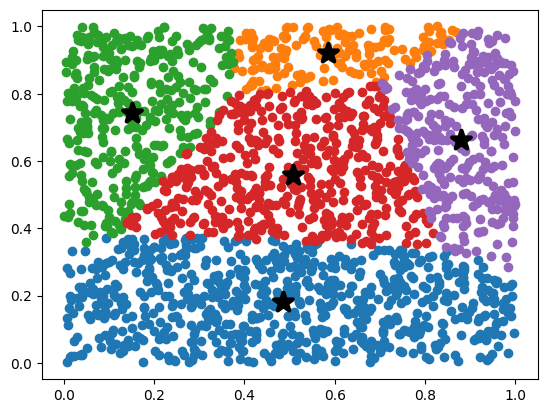

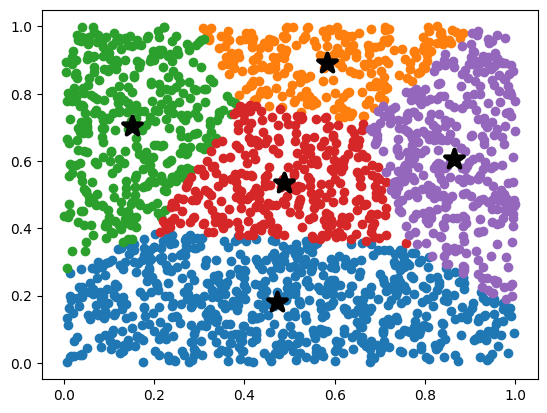

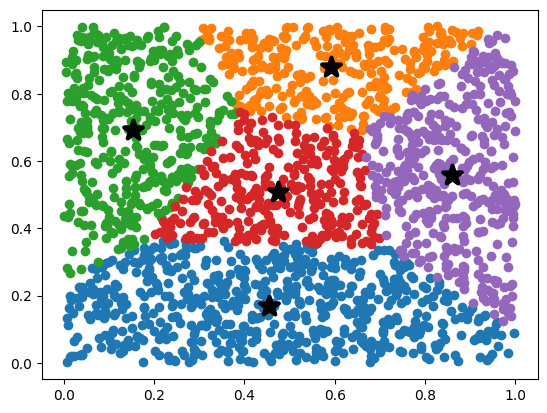

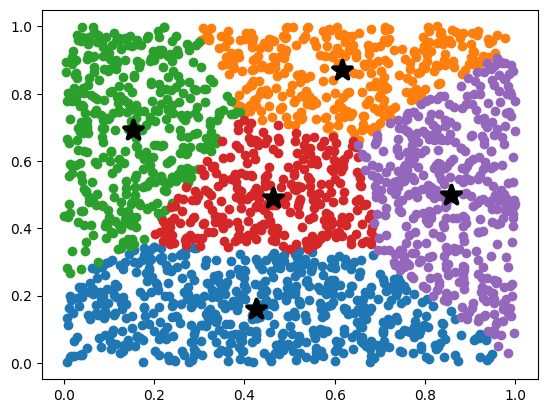

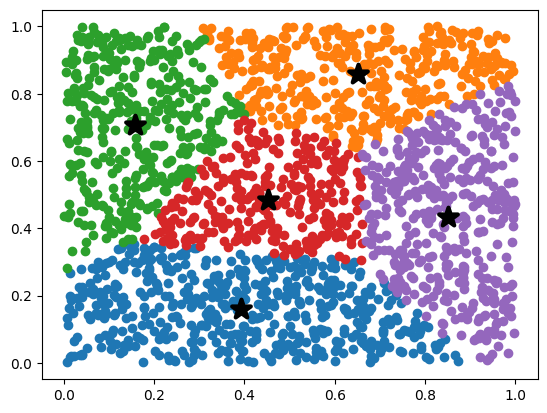

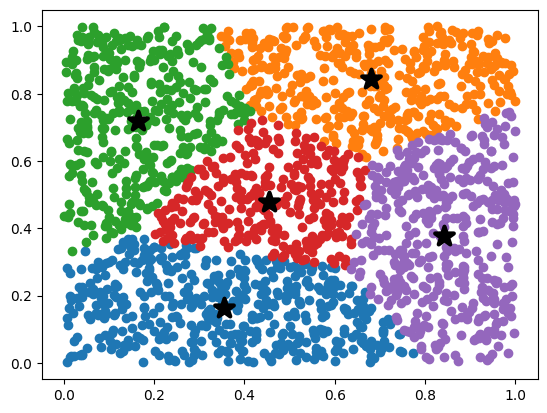

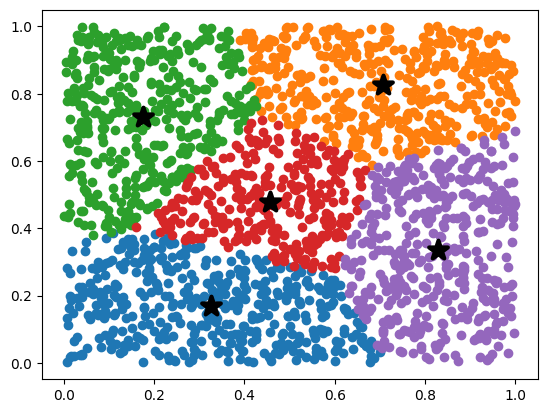

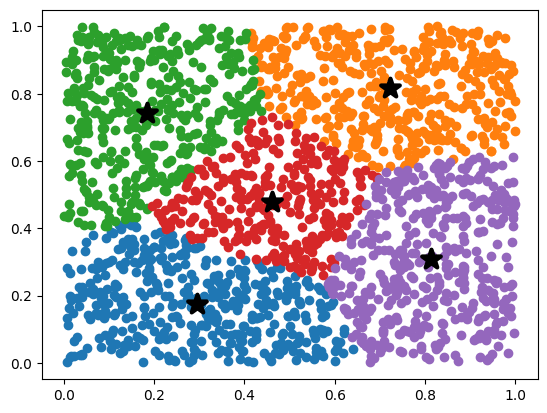

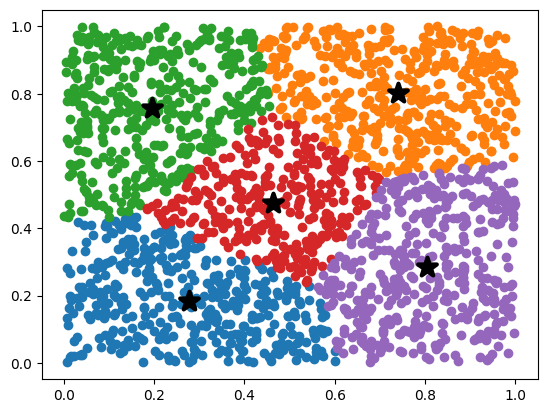

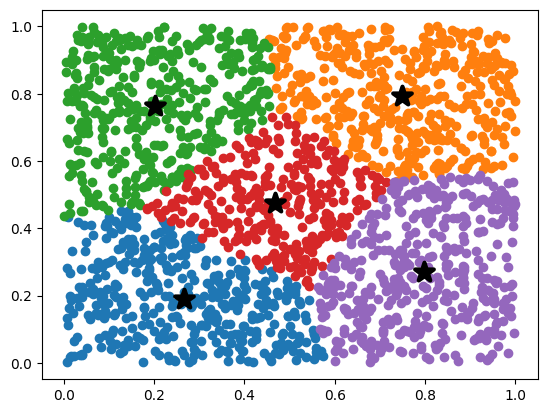

In [ ]:
import random
import math
def update_centroids(clusters):
    centroids = []
    for cluster_index in clusters:
        centroid = (
            sum([point[0] for point in clusters[cluster_index]]) / len(clusters[cluster_index]),
            sum([point[1] for point in clusters[cluster_index]]) / len(clusters[cluster_index])
        )
        centroids.append(centroid)
    return centroids
def k_means_clustering(data, k, max_iterations, plot_steps=False):
    centroids = random.sample(list(data), k)
    for i in range(max_iterations):
        clusters = assign_to_cluster(list(data), centroids)
        new_centroids = update_centroids(clusters)
        if new_centroids == centroids:
            break
        centroids = new_centroids
        if plot_steps:
            for i in range(len(clusters)):
              x = []
              y = []
              for p in clusters[i]:
                x.append(p[0])
                y.append(p[1])
              plt.scatter(x, y)
            x = [p[0] for p in centroids]
            y = [p[1] for p in centroids]
            plt.scatter(x, y, marker='*', s=200, linewidths=3, color='black')
            plt.show()
    return clusters
data = generate_data.iloc[:2000].apply(pd.to_numeric)
clusters = k_means_clustering(data.values.tolist(), 5, 10, plot_steps=True)
centroids = update_centroids(clusters)



## TASK 2 CURE


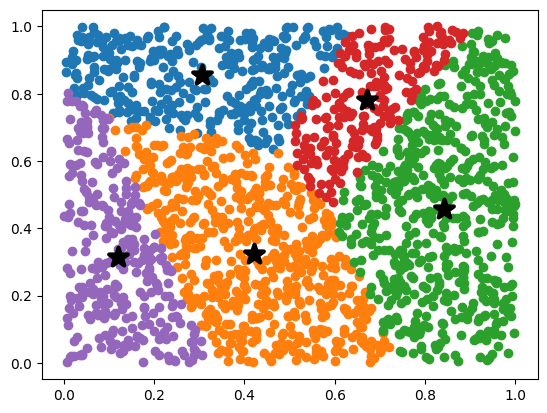

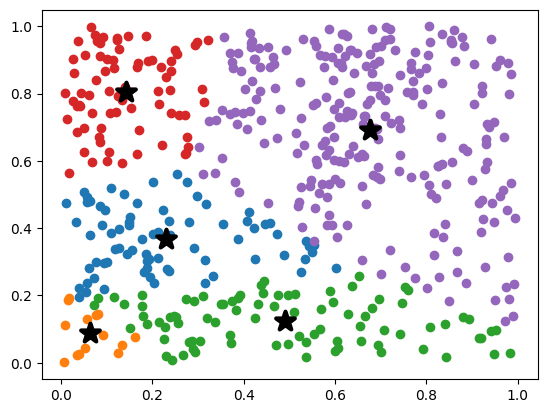

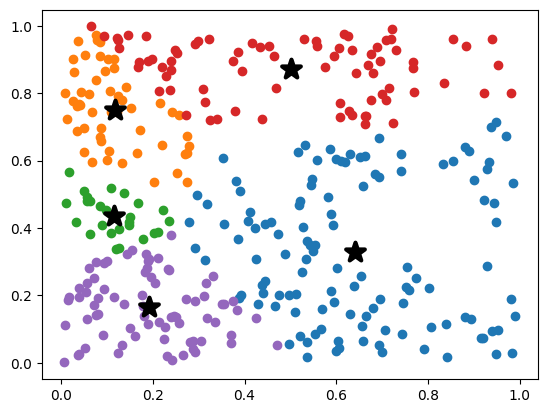

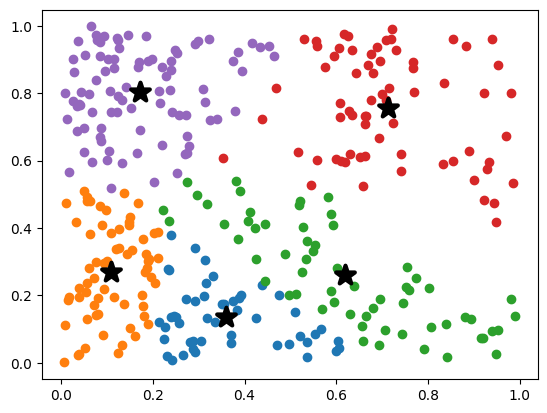

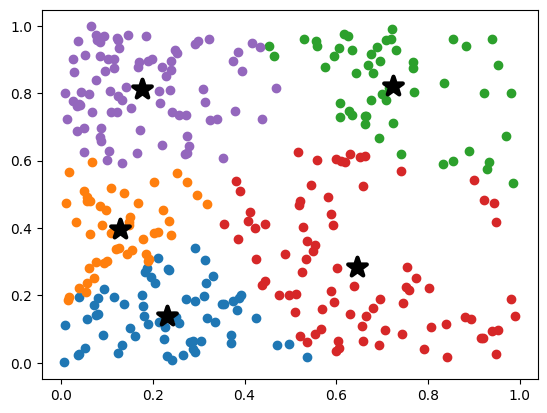

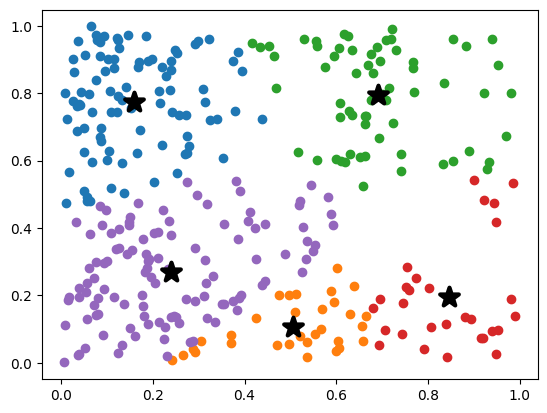

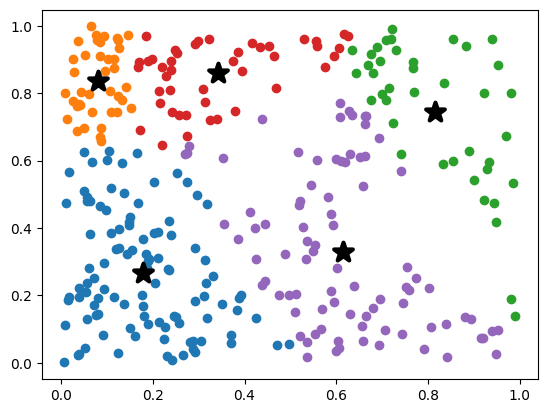

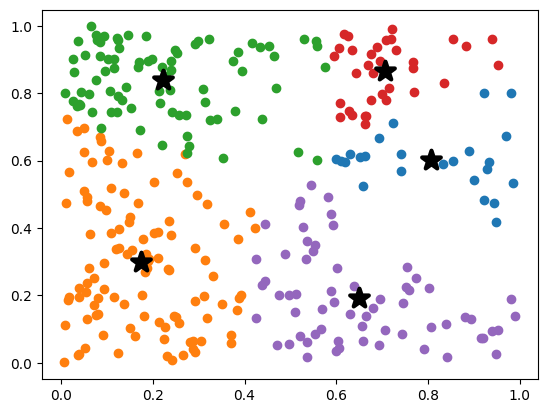

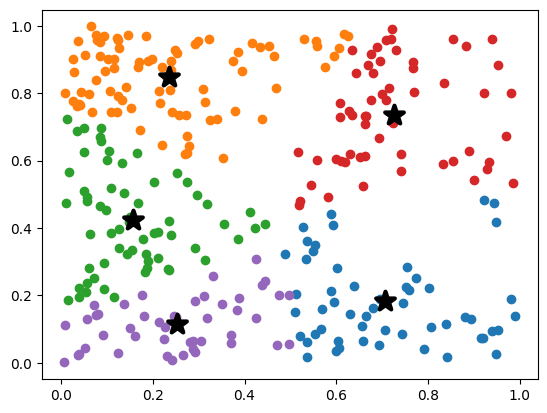

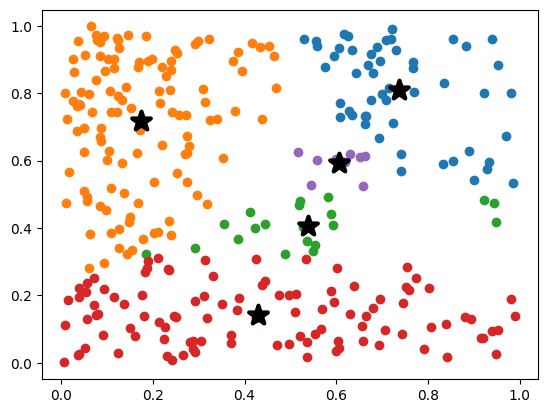

In [ ]:
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# this is the formula caculating distance between two points in n-dimensional space using the numpy library
# def euclidean_distance(p1, p2):
#     return np.sqrt(np.sum((np.array(p1) - np.array(p2)) ** 2))


# this is the formula caculating distance between two points in 2D space using the Pythagorean theorem
def euclidean_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def assign_to_cluster(data, centroids):
    clusters = {}
    for i in range(len(centroids)):
        clusters[i] = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster_index = distances.index(min(distances))
        clusters[cluster_index].append(point)
    return clusters

def update_centroids(clusters):
    centroids = []
    for cluster_index in clusters:
        centroid = np.mean(clusters[cluster_index], axis=0)
        centroids.append(centroid)
    return centroids
def cure_clustering(data, k, max_iterations, plot_steps=False, alpha=0.5, num_replacement=100):
    data = np.array(data)
    centroids = random.sample(list(data), k)
    for i in range(max_iterations):
        clusters = assign_to_cluster(list(data), centroids)
        new_centroids = update_centroids(clusters)
        if np.array_equal(new_centroids, centroids):
            break
        centroids = new_centroids
        if plot_steps:
            for i in range(len(clusters)):
                cluster_points = np.array(clusters[i])
                plt.scatter(cluster_points[:, 0], cluster_points[:, 1])
            centroid_points = np.array(centroids)
            plt.scatter(centroid_points[:, 0], centroid_points[:, 1], marker='*', s=200, linewidths=3, color='black')
            plt.show()
        data = []
        for cluster_index in clusters:
            cluster_size = len(clusters[cluster_index])
            num_rep = min(num_replacement, cluster_size)

            representative_points = random.sample(clusters[cluster_index], num_rep)
            data.extend(representative_points)
        centroids = random.sample(data, k)
    return clusters

data = generate_data.iloc[:2000].apply(pd.to_numeric)
data = data.values.tolist()
clusters = cure_clustering(data, 5, 10, plot_steps=True)
centroids = update_centroids(clusters)

